 COGNIFYZ CUSTOMER PREFERENCE ANALYSIS STARTED
 Dataset loaded: 9,551 rows × 21 columns

 Most Popular Cuisines by Votes
Cuisine
North Indian    595981
Chinese         364351
Italian         329265
Continental     288255
Fast Food       184058
American        183117
Cafe            177568
Mughlai         151946
Desserts        105889
Asian           104303
Name: Votes, dtype: int64


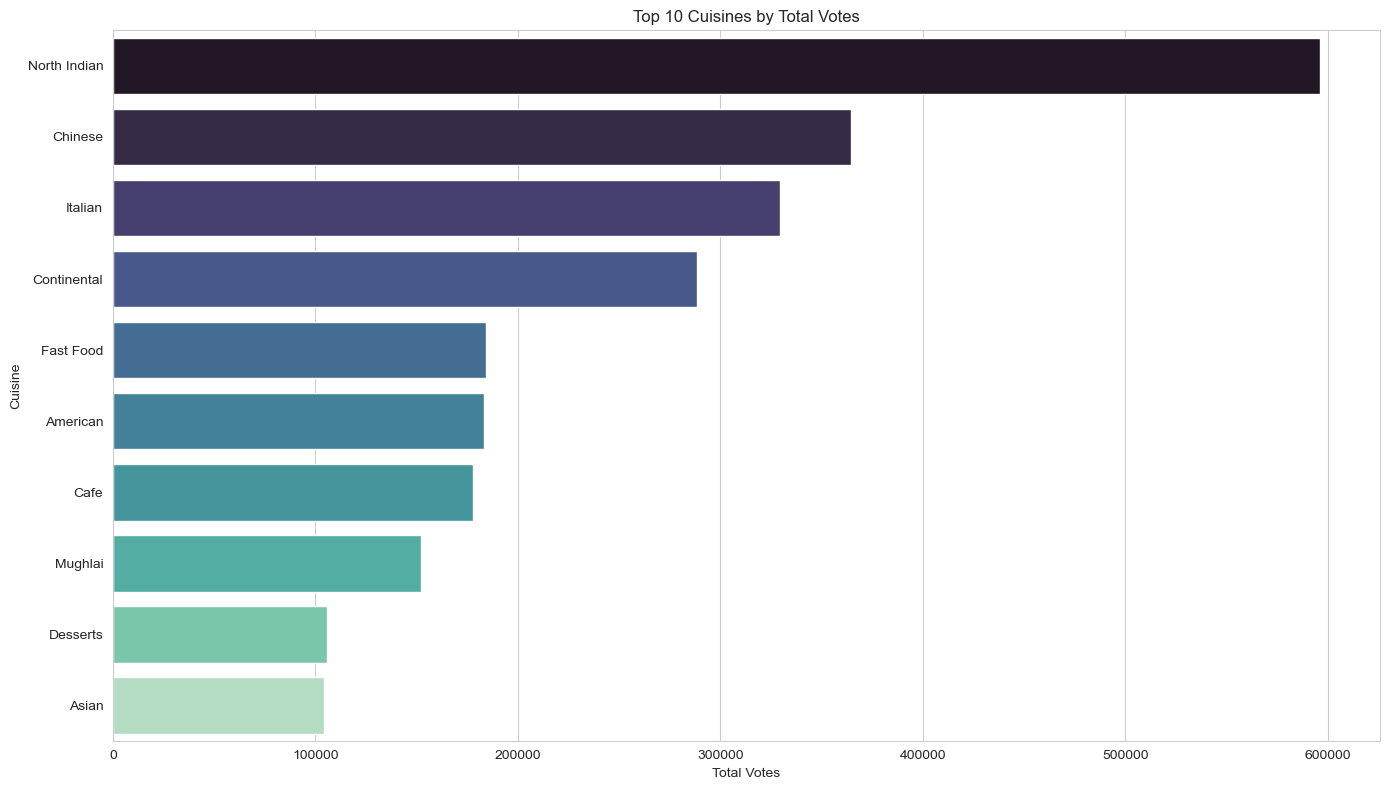


⭐ Average Rating by Cuisine
Cuisine
Sunda         4.900000
B�_rek        4.700000
Taiwanese     4.650000
Ramen         4.500000
Dim Sum       4.466667
Hawaiian      4.412500
D�_ner        4.400000
Bubble Tea    4.400000
Curry         4.400000
Kebab         4.380000
Name: Aggregate rating, dtype: float64


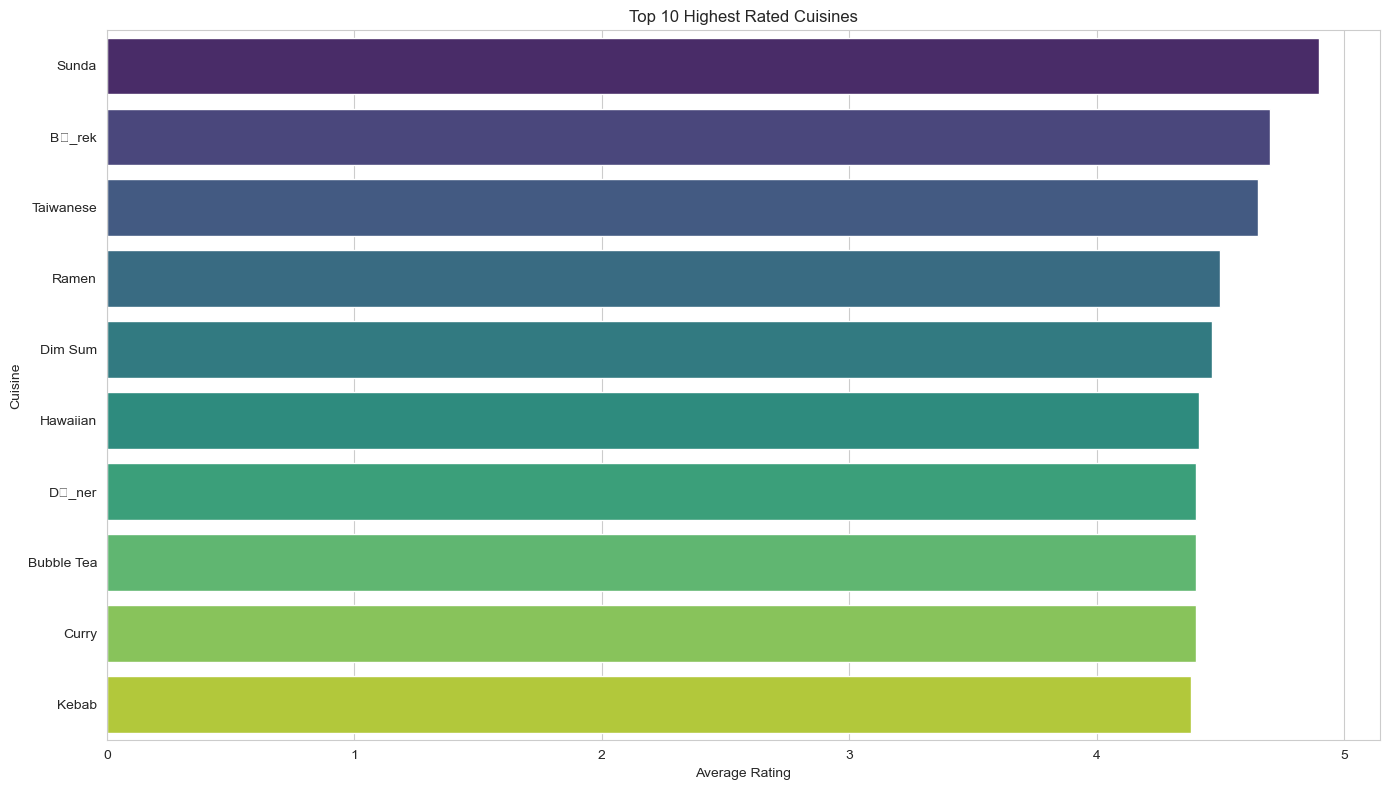


 High Popularity & High Rating Cuisines (>1% votes)
Cuisine
Mediterranean    3.948214
European         3.910811
Seafood          3.862069
Asian            3.815021
Mexican          3.723204
American         3.661538
Thai             3.659829
Italian          3.562042
Burger           3.520717
Continental      3.518750
Name: Aggregate rating, dtype: float64

 Executive Summary:
 Total_Cuisines_Analyzed: 146
 Top_Voted_Cuisine: North Indian
 Highest_Rated_Cuisine: Sunda

 Files generated:
 popular_cuisines_votes.png
 top_cuisines_ratings.png
 cognifyz_cuisine_preference_summary.csv

 CUSTOMER PREFERENCE ANALYSIS COMPLETED!
 Ready for Cognifyz submission!


In [1]:
# =============================================================================
# COGNIFYZ TECHNOLOGIES - CUSTOMER PREFERENCE ANALYSIS TASK 8
# Analyze cuisine relation with rating and votes
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

print(" COGNIFYZ CUSTOMER PREFERENCE ANALYSIS STARTED")
print("="*80)

# 1. Load dataset (original file)
df = pd.read_csv('Dataset .csv')
print(f" Dataset loaded: {df.shape[0]:,} rows × {df.shape[1]} columns")

# 2. Explode cuisines into one cuisine per row for groupby
if 'Cuisines' in df.columns:
    df_exp = df.copy()
    df_exp['Cuisines'] = df_exp['Cuisines'].fillna('')
    df_exp = df_exp.assign(Cuisine=df_exp['Cuisines'].str.split(',')).explode('Cuisine')
    df_exp['Cuisine'] = df_exp['Cuisine'].str.strip()
else:
    raise KeyError("'Cuisines' column not found!")

# 3. Most popular cuisines by total votes
print("\n Most Popular Cuisines by Votes")
pop_cuisine_votes = df_exp.groupby('Cuisine')['Votes'].sum().sort_values(ascending=False).head(10)
print(pop_cuisine_votes)

plt.figure()
sns.barplot(x=pop_cuisine_votes.values, y=pop_cuisine_votes.index, palette='mako')
plt.title('Top 10 Cuisines by Total Votes')
plt.xlabel('Total Votes')
plt.ylabel('Cuisine')
plt.tight_layout()
plt.savefig('popular_cuisines_votes.png')
plt.show()

# 4. Average rating by cuisine
print("\n⭐ Average Rating by Cuisine")
avg_cuisine_rating = df_exp.groupby('Cuisine')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
print(avg_cuisine_rating)

plt.figure()
sns.barplot(x=avg_cuisine_rating.values, y=avg_cuisine_rating.index, palette='viridis')
plt.title('Top 10 Highest Rated Cuisines')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.tight_layout()
plt.savefig('top_cuisines_ratings.png')
plt.show()

# 5. Cuisines with high popularity and high rating (votes > threshold)
votes_threshold = df_exp['Votes'].sum() * 0.01  # At least 1% of votes
high_popular_cuisines = df_exp.groupby('Cuisine').filter(lambda x: x['Votes'].sum() > votes_threshold)
mean_ratings = high_popular_cuisines.groupby('Cuisine')['Aggregate rating'].mean().sort_values(ascending=False).head(10)

print("\n High Popularity & High Rating Cuisines (>1% votes)")
print(mean_ratings)

# 6. Summary
summary = {
    'Total_Cuisines_Analyzed': df_exp['Cuisine'].nunique(),
    'Top_Voted_Cuisine': pop_cuisine_votes.index[0],
    'Highest_Rated_Cuisine': avg_cuisine_rating.index[0]
}

print("\n Executive Summary:")
for k, v in summary.items():
    print(f" {k}: {v}")

# Save summary data
summary_df = pd.DataFrame([summary])
summary_df.to_csv('cognifyz_cuisine_preference_summary.csv', index=False)

print("\n Files generated:")
print(" popular_cuisines_votes.png")
print(" top_cuisines_ratings.png")
print(" cognifyz_cuisine_preference_summary.csv")

print("\n CUSTOMER PREFERENCE ANALYSIS COMPLETED!")
print(" Ready for Cognifyz submission!")
